In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
!pip install hdbscan

In [3]:

df = pd.DataFrame()
for i in range(5):
    df = pd.concat([df, pd.read_csv('data/data'+str(i)+'.csv')], ignore_index=True)
    


In [4]:
df.columns = ["rc"+str(x) for x in range(40)] + ["vx","vy","w1vx","w2vx","w1vy","w2vy"] + ["w1x","w2x","w1y","w2y"] +  ["y","linedist"]
df.drop_duplicates(keep=False,inplace=True)
df.fillna(df.mean())
print(df)

         rc0  rc1   rc2   rc3   rc4   rc5   rc6   rc7   rc8   rc9  ...  \
10       1.0  1.0  1.00  0.80  0.65  0.55  0.45  0.45  0.40  0.40  ...   
11       1.0  1.0  1.00  0.75  0.60  0.50  0.45  0.40  0.35  0.35  ...   
12       1.0  1.0  1.00  0.70  0.55  0.45  0.40  0.35  0.35  0.35  ...   
13       1.0  1.0  1.00  0.70  0.55  0.45  0.40  0.35  0.35  0.35  ...   
14       1.0  1.0  0.85  0.60  0.45  0.40  0.35  0.30  0.30  0.30  ...   
...      ...  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1353758  1.0  1.0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   
1353759  1.0  1.0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   
1353760  1.0  1.0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   
1353761  1.0  1.0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   
1353762  1.0  1.0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   

             w1vx  w2vx      w1vy  w2vy       w1x       w2x       w1y  \
10       0.511519   0.5  0.504723   0.

In [5]:
# from sklearn.preprocessing import StandardScaler
# features = df.columns


# x = StandardScaler().fit_transform(df)

In [6]:
# from sklearn.decomposition import PCA# Make an instance of the Model

# pca = PCA(2)

In [7]:
# principalComponents = pca.fit_transform(x)

In [8]:
# pca.explained_variance_ratio_

In [9]:
# pcdf = pd.DataFrame(data = principalComponents);
# pcdf.columns = ["p1","p2"]
# pcdf
# # principalComponents.plot.scatter(x = 'Name', y = 'Age', s = 100);

In [10]:
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)

# ax.scatter(x=pcdf['p1'],y=pcdf['p2'],c="blue",marker="o",s=0.0001)

# ax.grid()
# plt.savefig("test.svg")

In [11]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# A list holds the SSE values for each k
# sse = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k,
#         n_init=10,
#         max_iter=300,
#         random_state=42)
#     kmeans.fit(df)
#     sse.append(kmeans.inertia_)

# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), sse)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()



In [12]:
import hdbscan
clusterer = hdbscan.HDBSCAN(prediction_data=True)
clusterer.fit( df.sample(n = 300000))

# kmeans = KMeans(n_clusters=1000,
#     n_init=10,
#     max_iter=300)
# kmeans.fit(df)
# kmeans.inertia_

HDBSCAN(prediction_data=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

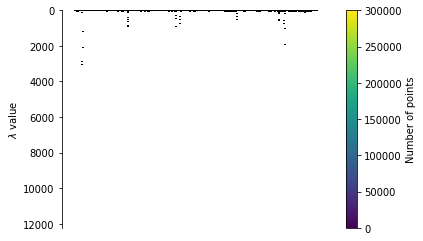

In [13]:
clusterer.condensed_tree_.plot()

In [14]:
clusterer.labels_.max()
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-08-16 01:37:29


In [15]:
import pickle


with open('hdbscan.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
env_size = clusterer.labels_.max()
env_size

9010

In [19]:
import numpy as np
q_table = np.zeros([env_size, 5])


In [45]:
from sklearn.neighbors import NearestNeighbors
class MEMORY():
    def __init__(self,mem_size=100000,n_neighbours=10):
        self.mem_size = mem_size
        self.states = np.array([0])
        self.neigh = NearestNeighbors(n_neighbors=n_neighbours)
        
    def add(self,new_state):
        self.states = np.vstack([self.states,[new_state]])
        self.states = self.states[-self.mem_size:]
        self.neigh.fit(self.states)
    
    def neighbours(self,new_state):
        return self.neigh.kneighbors(new_state)
        


memory = MEMORY(1000000,n_neighbours=5)


for i in range(100,0,-1):
    memory.add(i)
    
distances, indexes = memory.neighbours(np.array(80).reshape(-1, 1))





ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 0 and the array at index 1 has size 1